#Unsupervised Learning : Hierarchical Clustering 

ชุดข้อมูล (Dataset) : ข้อมูลการลาหยุดงานของพนักงานบริษัทเอกชนแห่งหนึ่ง ย้อนหลัง 3 เดือน ตั้งแต่มกราคม ถึงมีนาคม พ.ศ. 2565

## Data Description

|Variable| ตัวแปร | คำอธิบาย |
| ---------- | ----------- | ----------- |
|Gender|เพศ|เพศตามบัตรประชาชน - ชาย(Male), หญิง(Female)|
|Role|ตำแหน่งงาน|ตำแหน่งงาน - Business Analyst, Document Controller, Programer, Project Manager, Quality Assurance, Report, System Analysis ,System Engineer, Product Support, System Engineer, Technical Support, HR officer, Financial|
|Department|แผนก|แผนกภายในบริษัท - DEVELOPMENT, TECHNICAL AND PRODUCT, APPLICATION, HUMAN RESOUCE, FINANCIAL AND ACCOUNTING|
|Year_exp|อายุการทำงาน|จำนวนปีที่ทำงาน คำนวณจากวันที่เข้าทำงานจนถึงปัจจุบัน|
|Month|เดือนที่ลาหยุด|เดือน - มกราคม กุมภาพันธ์,  มีนาคม|
|LeaveType|ประเภทการลา|ลาป่วย, ลาพักร้อน|
|HoursA|จำนวนชั่วโมงที่ลาหยุดในแต่ละครั้ง|จำนวนชั่วโมงคำนวณมาจากจำนวนวันที่ลาหยุด โดย 1 วันเท่ากับ 8 ชั่วโมง|
|Late|จำนวนครั้งที่มาสาย|จำนวนครั้งที่มาสายตลอด 3 เดือน|
|Age|อายุ|อายุคำนวณมาจากวันเกิดตามบัตรประชาชน|
|Education|ระดับการศึกษา|ปริญญาตรี, ปริญญาโท|


## วัตถุประสงค์
 1. เพื่อจัดกลุ่มพนักงานตามลักษณะการลางาน  และประสบการณ์การทำงาน
 2. เปรียบเทียบคนลักษณะแบบไหนมีโอกาสลางานบ่อย

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.preprocessing import normalize
#Scikit-learn : Hierarchical Clustering
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy as sch # กราฟ
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

#Import Data


In [ ]:
#เชื่อมต่อ Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# อ่านข้อมูลไฟล์ CSV.
data = pd.read_csv("/content/drive/MyDrive/KMITL/Project Final /Data/Data_Leave.csv")
data.head()

,ID,Gender,Role,Department,YearExp,Month,LeaveType,Absenteeism,HoursA,Late,Age,Educational
0,4,Female,Document Controller,Devlopment,16,January,Sick leave,2.0,16,0,42,Bachelor's degree
1,4,Female,Document Controller,Devlopment,16,March,Sick leave,2.0,16,0,42,Bachelor's degree
2,4,Female,Document Controller,Devlopment,16,March,Vacation Leave,1.5,12,0,42,Bachelor's degree
3,19,Female,Project Manager,Devlopment,15,January,Sick leave,2.5,20,1,49,Master's degree
4,19,Female,Project Manager,Devlopment,15,February,Sick leave,1.5,12,1,49,Master's degree


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Explore Data 
ตรวจสอบข้อมูลเบื้องต้น

In [ ]:
data.head()

,ID,Gender,Role,Department,YearExp,Month,LeaveType,Absenteeism,HoursA,Late,Age,Educational
0,4,Female,Document Controller,Devlopment,16,January,Sick leave,2.0,16,0,42,Bachelor's degree
1,4,Female,Document Controller,Devlopment,16,March,Sick leave,2.0,16,0,42,Bachelor's degree
2,4,Female,Document Controller,Devlopment,16,March,Vacation Leave,1.5,12,0,42,Bachelor's degree
3,19,Female,Project Manager,Devlopment,15,January,Sick leave,2.5,20,1,49,Master's degree
4,19,Female,Project Manager,Devlopment,15,February,Sick leave,1.5,12,1,49,Master's degree


In [ ]:
#ตรวจสอบจำนวนข้อมูล
data.shape

(64, 12)

In [ ]:
#ตรวจสอบประเภทข้อมูล
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 4 to 90
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       64 non-null     object 
 1   Role         64 non-null     object 
 2   Department   64 non-null     object 
 3   YearExp      64 non-null     int64  
 4   Month        64 non-null     object 
 5   LeaveType    64 non-null     object 
 6   Absenteeism  64 non-null     float64
 7   HoursA       64 non-null     int64  
 8   Late         64 non-null     int64  
 9   Age          64 non-null     int64  
 10  Educational  64 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 6.0+ KB


In [ ]:
# ตรวจสอบค่า Null
data.isnull().sum()

Gender         0
Role           0
Department     0
YearExp        0
Month          0
LeaveType      0
Absenteeism    0
HoursA         0
Late           0
Age            0
Educational    0
dtype: int64

##Drop 

ลบ column Absenteeism  ออก เนื่องจากมีความสัมพันธ์เชิงเส้นกันสูงระหว่างตัวแปร Absenteeism และ Hours ถ้าดูจากความหมายของตัวแปร Absenteeism คือจำนวนวันที่ลาหยุดในแต่ละครั้ง และ Hours คือจำนวนชั่วโมงที่ลาหยุด ที่ได้คำนวณมาจากจำนวนวันลาหยุด โดย 1 วัน เท่ากับ 8 ชั่วโมง


In [ ]:
data = data.drop(["ID","Absenteeism"],axis=1)

In [ ]:
data.head()

,Gender,Role,Department,YearExp,Month,LeaveType,HoursA,Late,Age,Educational
0,Female,Document Controller,Devlopment,16,January,Sick leave,16,0,42,Bachelor's degree
1,Female,Document Controller,Devlopment,16,March,Sick leave,16,0,42,Bachelor's degree
2,Female,Document Controller,Devlopment,16,March,Vacation Leave,12,0,42,Bachelor's degree
3,Female,Project Manager,Devlopment,15,January,Sick leave,20,1,49,Master's degree
4,Female,Project Manager,Devlopment,15,February,Sick leave,12,1,49,Master's degree


## Variable
แบ่งประเภทข้อมูล

### Divide columns to numerical and categorical ones
แบ่งคอลัมน์เป็นเชิงปริมาณ และเชิงคุณภาพ

In [ ]:
# divide columns to numerical and categorical ones
# ใส่ column Month_of_absence ไม่ได้ ,'Month_of_absence'
categorical_atts = ['Gender','Role','Department','Month','LeaveType', 'Educational']
numerical_atts = data.drop(columns=categorical_atts).columns.to_list()

#update types of categorical columns 
#for cat in categorical_atts:
#data[cat] = data[cat].astype('category')

In [ ]:
# number of unique values in categorical atts
data[categorical_atts].nunique()

Gender          2
Role           12
Department      5
Month           3
LeaveType       2
Educational     2
dtype: int64

### Numerical variable
ตรวจสอบข้อมูลเชิงปริมาณ

In [ ]:
data[numerical_atts].describe()

,YearExp,HoursA,Late,Age
count,64.000000,64.000000,64.000000,64.000000
mean,8.062500,12.125000,0.718750,37.156250
std,3.890873,6.491753,1.385512,5.498106
min,3.000000,4.000000,0.000000,29.000000
25%,5.000000,8.000000,0.000000,31.000000
50%,7.000000,12.000000,0.000000,37.000000
75%,9.000000,16.000000,0.250000,41.000000
max,16.000000,24.000000,4.000000,49.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

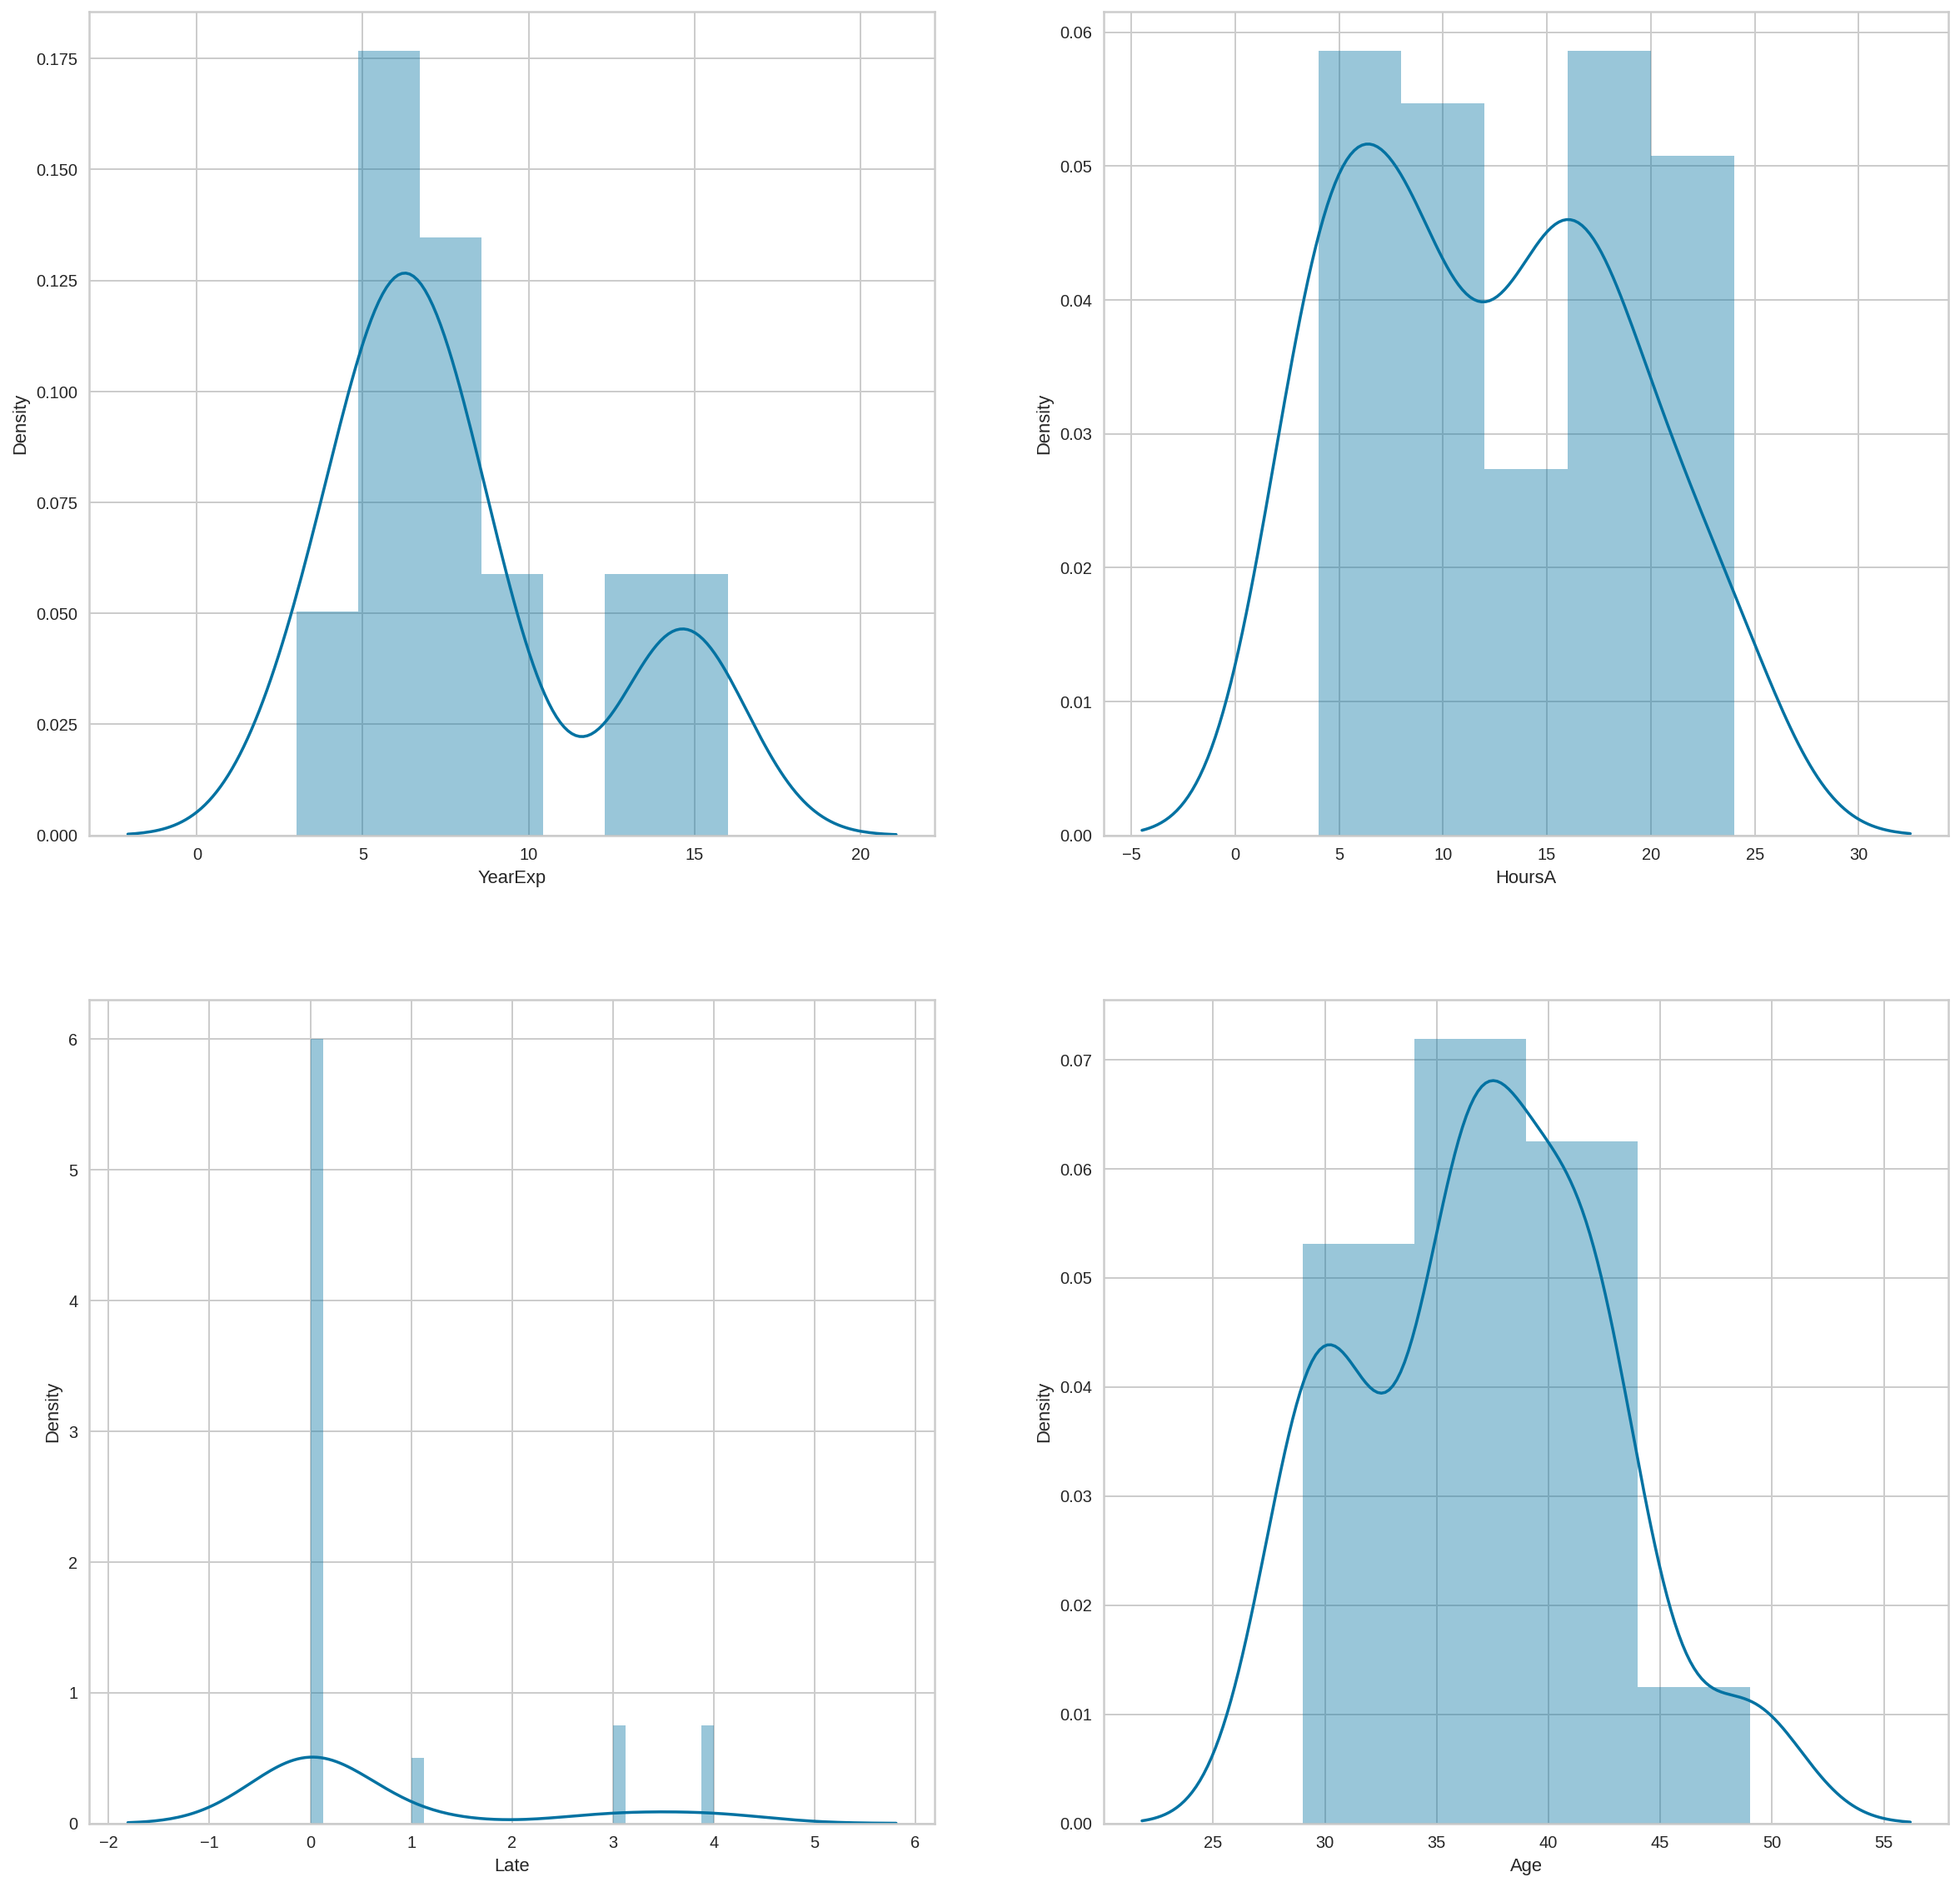

In [ ]:
# plot distribution of numerical attributes
num_df = data[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 5):
  plt.subplot(2, 2, i)
  sns.distplot(num_df[num_df.columns[i-1]])


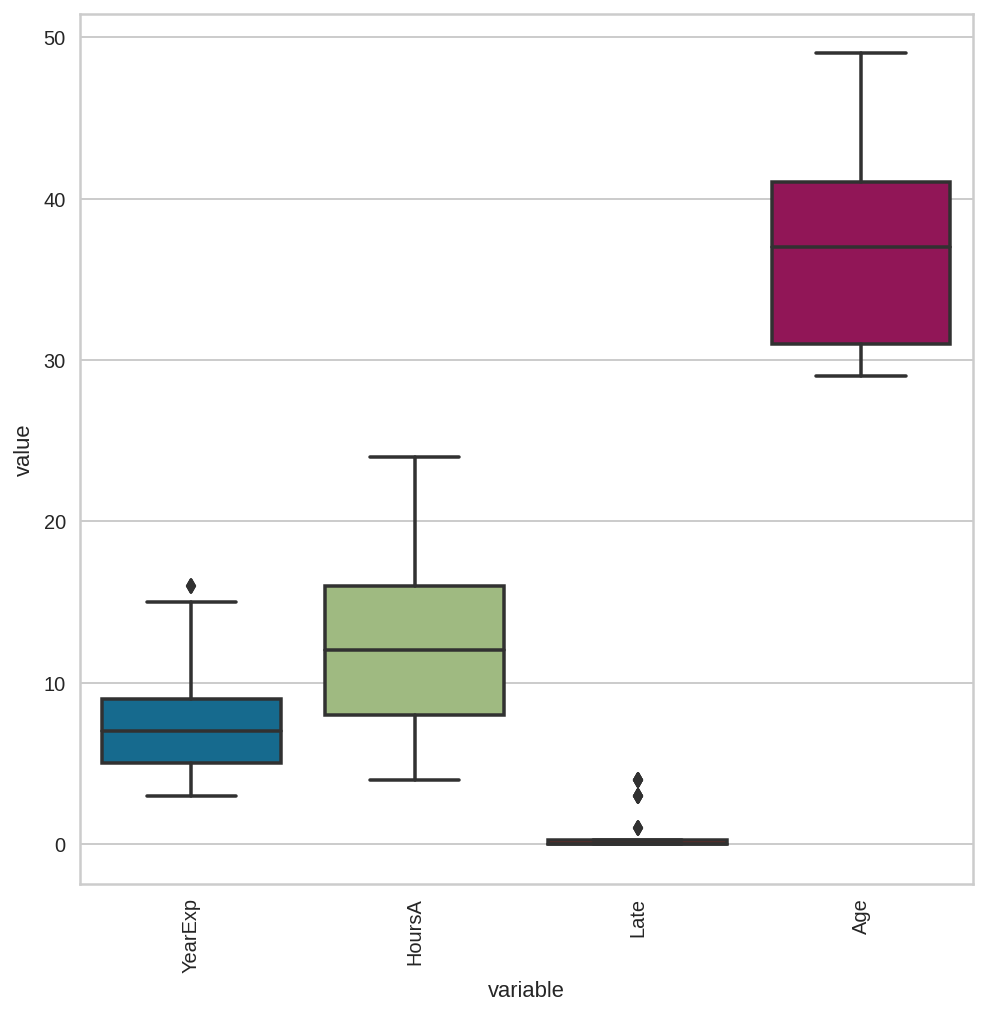

In [ ]:
# display boxlots
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=pd.melt(num_df))
plt.xticks(rotation=90)
plt.show()


###Categorical variable
ตรวจสอบข้อมูลเชิงคุณภาพ

In [ ]:
data[categorical_atts].describe()

,Gender,Role,Department,Month,LeaveType,Educational
count,64,64,64,64,64,64
unique,2,12,5,3,2,2
top,Female,Document Controller,Devlopment,March,Sick leave,Bachelor's degree
freq,33,12,43,26,35,55


In [ ]:
data['Gender'].value_counts()

Female    33
Male      31
Name: Gender, dtype: int64

In [ ]:
data['Role'].value_counts()

Document Controller    12
Report                  9
Programer               7
System Analysis         6
Quality Assurance       6
Business Analyst        5
Project Manager         4
Technical Support       4
HR officer              4
System Engineer         3
Product Support         2
Financial               2
Name: Role, dtype: int64

In [ ]:
data['Department'].value_counts()

Devlopment                  43
Technical and Support        9
Application                  6
HR officer                   4
Financial and Accounting     2
Name: Department, dtype: int64

In [ ]:
data['Month'].value_counts()

March       26
February    21
January     17
Name: Month, dtype: int64

In [ ]:
data['LeaveType'].value_counts()

Sick leave        35
Vacation Leave    29
Name: LeaveType, dtype: int64

In [ ]:
data['Educational'].value_counts()

Bachelor's degree    55
Master's degree       9
Name: Educational, dtype: int64

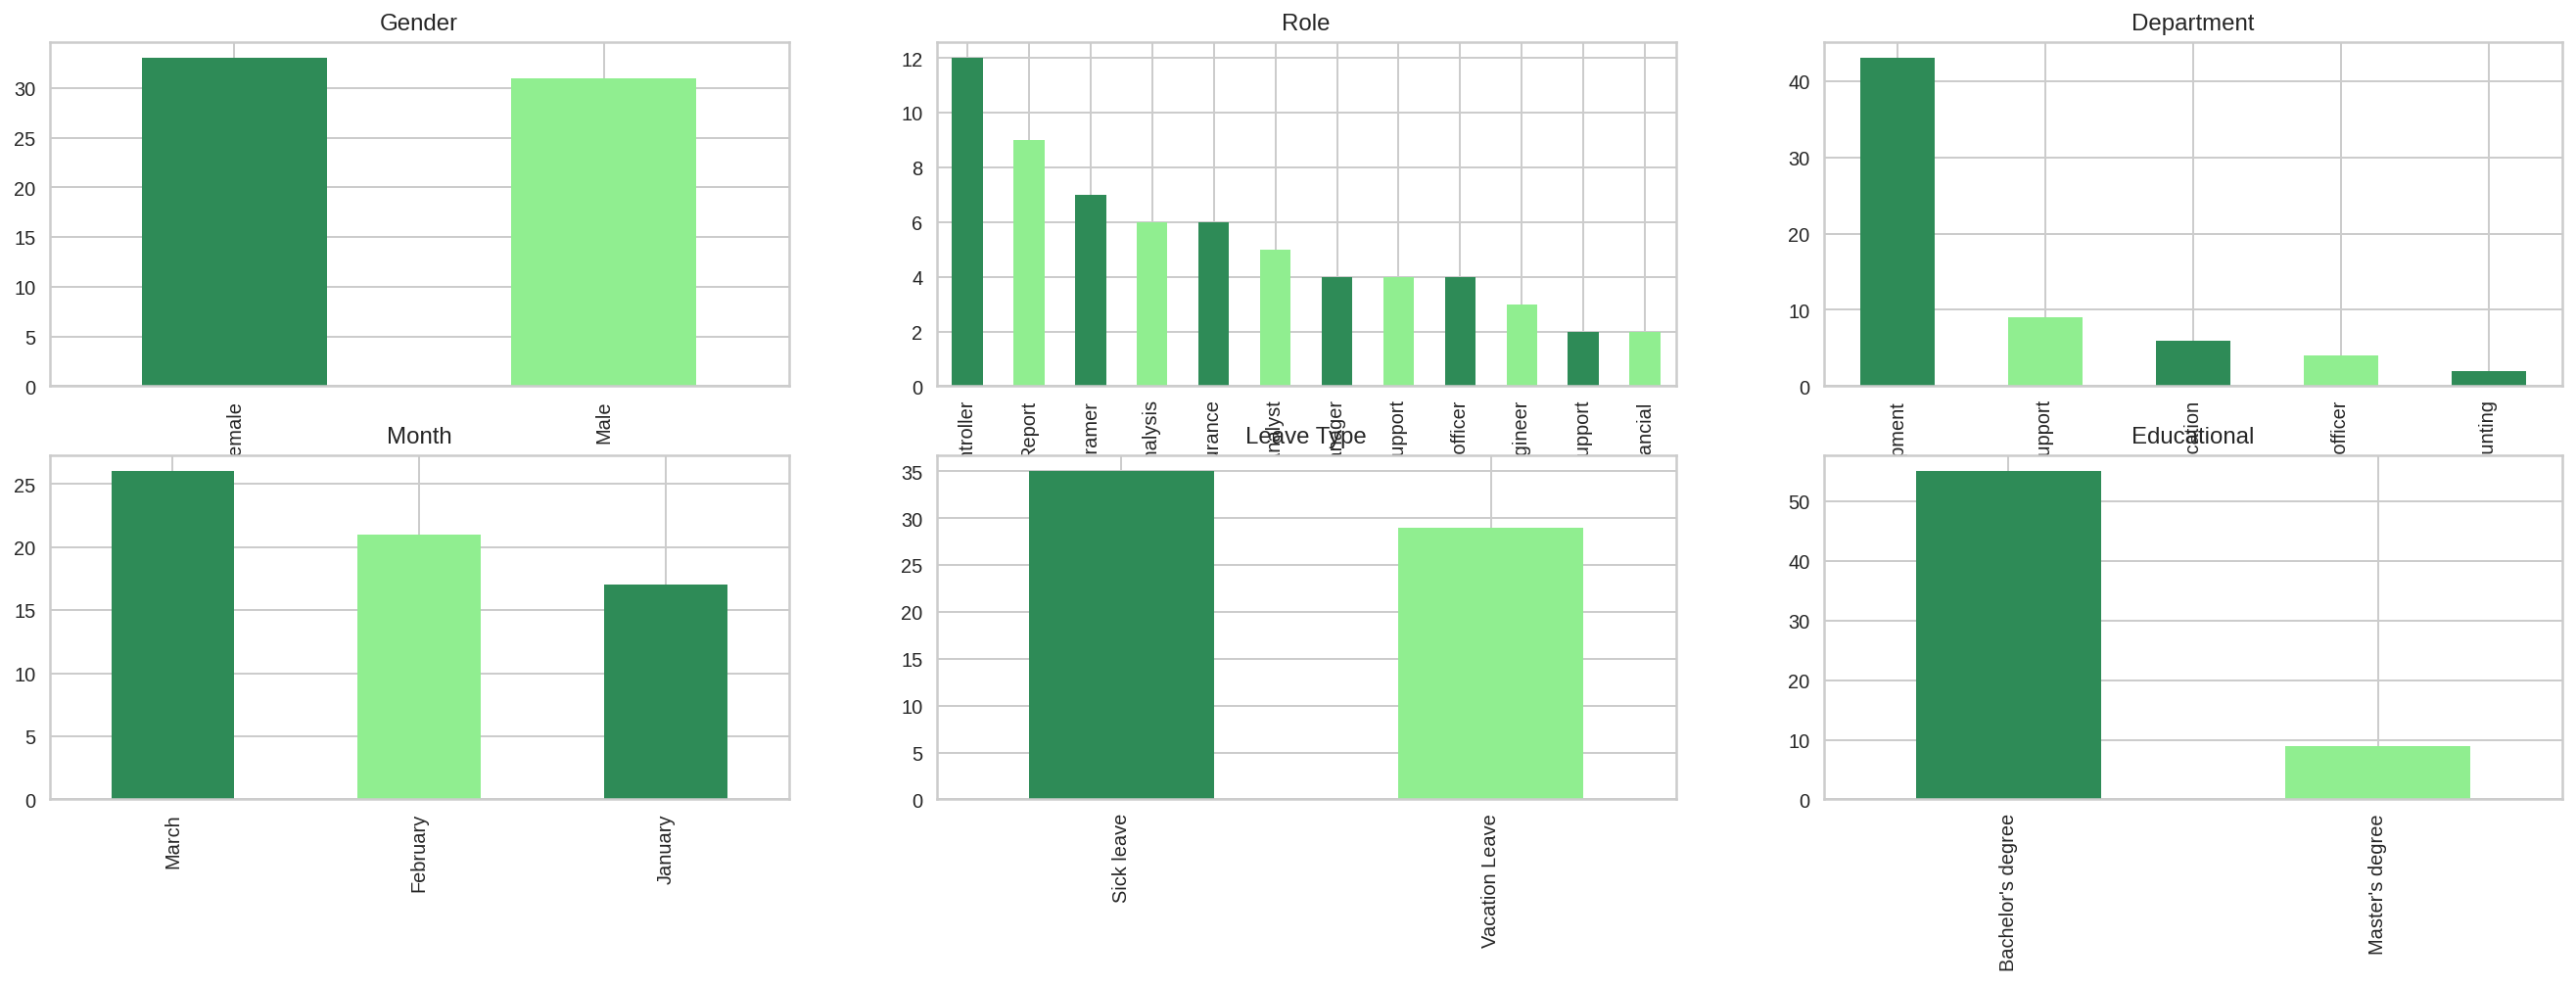

In [ ]:
plt.figure(figsize=(23,11))
plt.subplot(331) 
data['Gender'].value_counts(normalize=False).plot.bar(title= 'Gender', color=['seagreen','lightgreen']) 
plt.subplot(332) 
data['Role'].value_counts(normalize=False).plot.bar(title= 'Role', color=['seagreen','lightgreen']) 
plt.subplot(333) 
data['Department'].value_counts(normalize=False).plot.bar(title= 'Department', color=['seagreen','lightgreen']) 
plt.subplot(334) 
data['Month'].value_counts(normalize=False).plot.bar(title= 'Month', color=['seagreen','lightgreen']) 
plt.subplot(335) 
data['LeaveType'].value_counts(normalize=False).plot.bar(title= 'Leave Type', color=['seagreen','lightgreen']) 
plt.subplot(336) 
data['Educational'].value_counts(normalize=False).plot.bar(title= 'Educational', color=['seagreen','lightgreen']) 


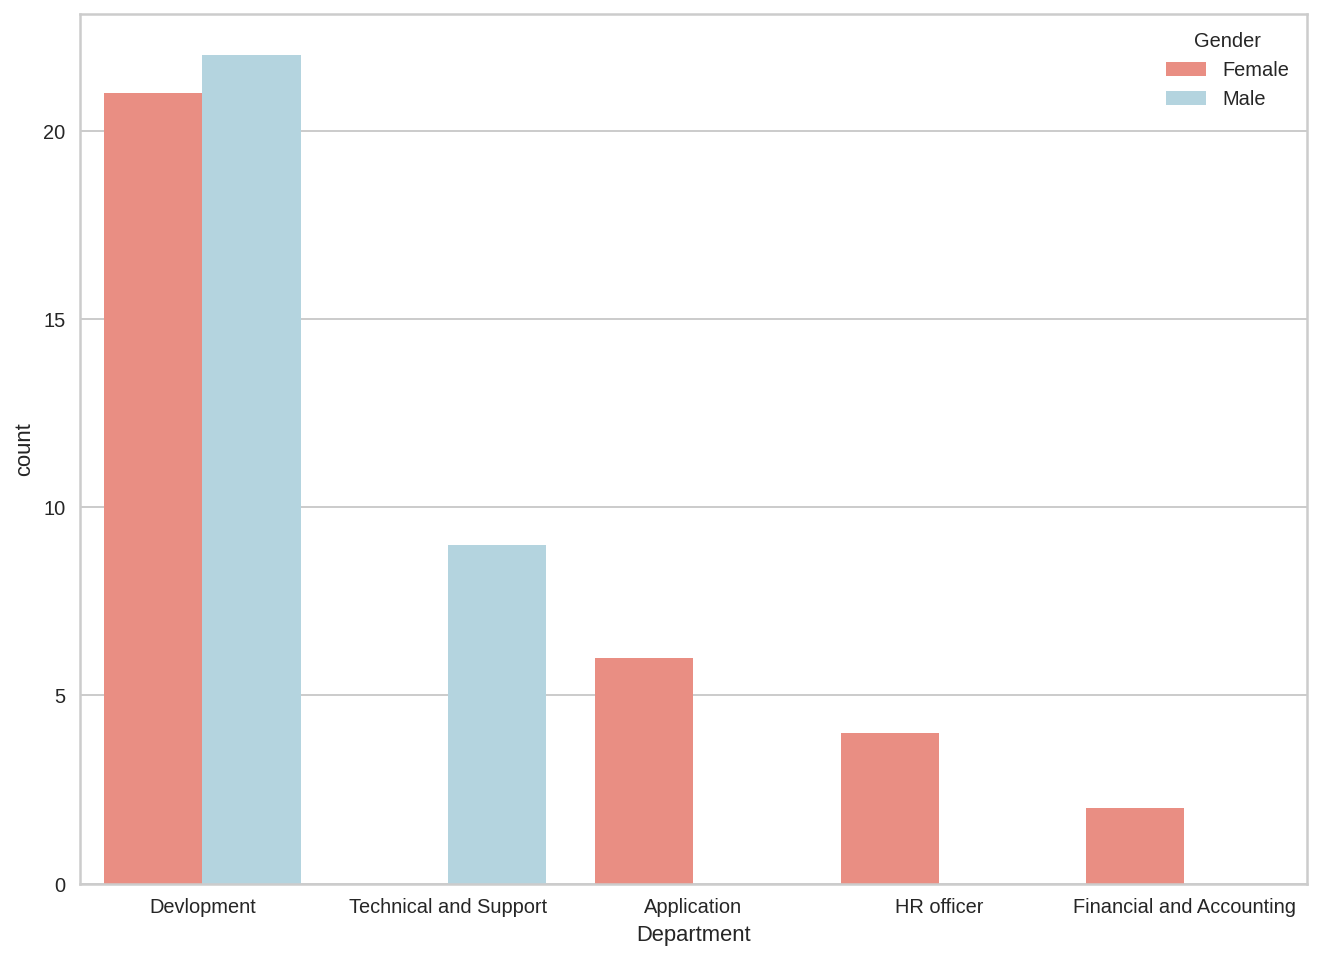

In [ ]:
plt.figure(figsize=(11,8))

sns.countplot(x = data['Department'], hue=data['Gender'], palette =['salmon','lightblue'])

ในส่วนของข้อมูลประเภท Categorical จะไม่ได้นำไปใช้วิเคราะห์ต่อ

##Correlation
ดูความสัมพันธ์ของข้อมูล

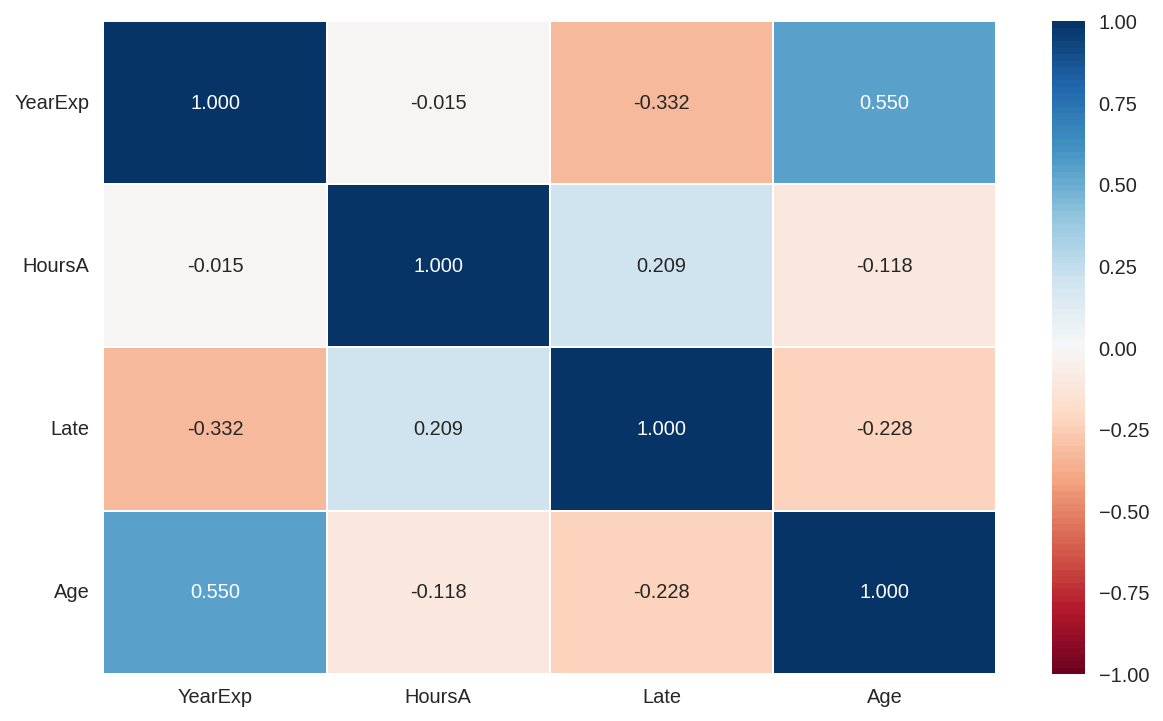

In [ ]:
# correlation matrix
num_corr = num_df.corr()
plts.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plts.yticks(rotation=0)
plts.show()

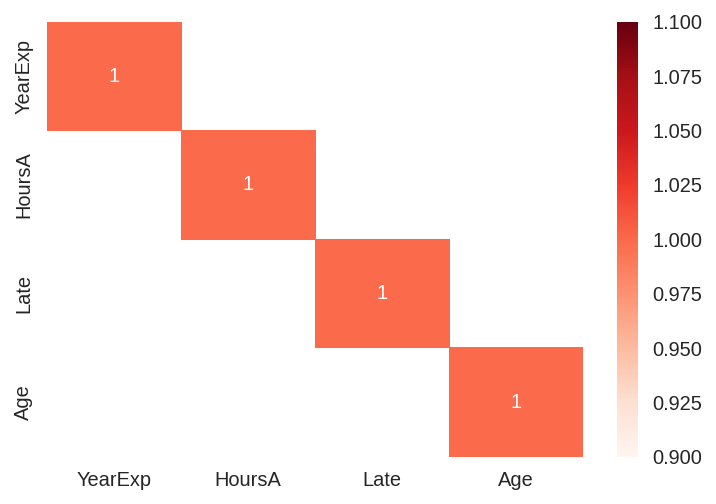

In [ ]:
# ดูความสัมพันธ์ของข้อมูล แต่ละตัวแปรไม่ควรมีสัมพันธ์กันมากเกินไป
corrMatrix = data.corr()
highCorr = corrMatrix[corrMatrix >= .7]
sns.heatmap(highCorr, annot=True, cmap="Reds")
plt.show()

#Data Preparation
การเตรียมข้อมูล

##Outlier

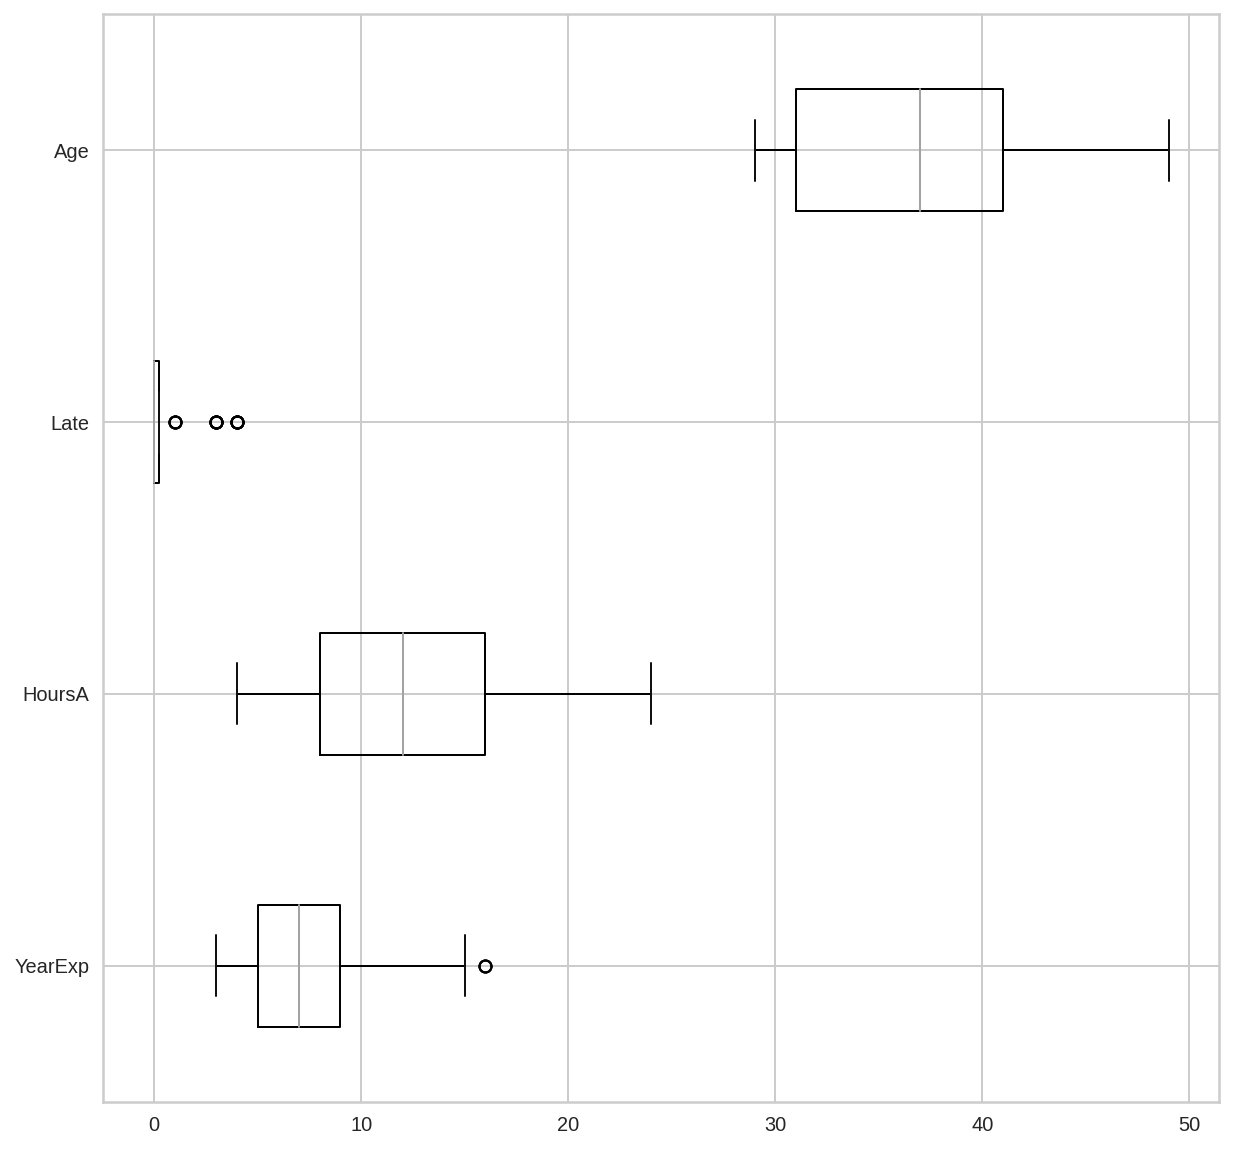

In [ ]:
data.boxplot(vert=False, figsize=(10,10))

In [ ]:
# Check for outliers using boxplots and drop them
for num_att in numerical_atts:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(data[num_att], [75,25])
    MEAN = data[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=data.drop(data.loc[data[num_att]< minimum,num_att].index) 
    data_clean=data.drop(data.loc[data[num_att]> maximum,num_att].index)

In [ ]:
# ข้อมูลมีขนาดเท่าเดิม คือ 64
len(data_clean)

64

##Normalization

In [ ]:
numerical_atts

['YearExp', 'HoursA', 'Late', 'Age']

In [ ]:
# transform data
numeric_transformer = MinMaxScaler()
#categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# exclude target attribute
numerical_atts = [x for x in numerical_atts]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts),
        ('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data)
data_trans = pd.DataFrame(data_pp, 
             columns = ['YearExp', 'HoursA', 'Late', 'Age','Gender', 'Role', 'Department', 'Month', 'LeaveType', 'Educational'])
data_trans

In [ ]:
numerical_atts

['YearExp', 'HoursA', 'Late', 'Age']

In [ ]:
data[categorical_atts]

,Gender,Role,Department,Month,LeaveType,Educational
ID,,,,,,
4,Female,Document Controller,Devlopment,January,Sick leave,Bachelor's degree
4,Female,Document Controller,Devlopment,March,Sick leave,Bachelor's degree
4,Female,Document Controller,Devlopment,March,Vacation Leave,Bachelor's degree
19,Female,Project Manager,Devlopment,January,Sick leave,Master's degree
19,Female,Project Manager,Devlopment,February,Sick leave,Master's degree
...,...,...,...,...,...,...
90,Male,Quality Assurance,Devlopment,February,Sick leave,Bachelor's degree
90,Male,Quality Assurance,Devlopment,March,Sick leave,Bachelor's degree
90,Male,Quality Assurance,Devlopment,March,Sick leave,Bachelor's degree


In [ ]:
data_scaled = normalize(data[numerical_atts])
data_scaled = pd.DataFrame(data_scaled, columns=numerical_atts)
data_scaled

,YearExp,HoursA,Late,Age
0,0.335377,0.335377,0.000000,0.880366
1,0.335377,0.335377,0.000000,0.880366
2,0.343947,0.257960,0.000000,0.902861
3,0.272637,0.363516,0.018176,0.890615
4,0.284953,0.227962,0.018997,0.930846
...,...,...,...,...
59,0.075545,0.402906,0.100727,0.906539
60,0.075545,0.402906,0.100727,0.906539
61,0.072315,0.482103,0.096421,0.867785
62,0.082046,0.109394,0.109394,0.984548


In [ ]:
categorical = pd.DataFrame(data[categorical_atts])
categorical

,Gender,Role,Department,Month,LeaveType,Educational
ID,,,,,,
4,Female,Document Controller,Devlopment,January,Sick leave,Bachelor's degree
4,Female,Document Controller,Devlopment,March,Sick leave,Bachelor's degree
4,Female,Document Controller,Devlopment,March,Vacation Leave,Bachelor's degree
19,Female,Project Manager,Devlopment,January,Sick leave,Master's degree
19,Female,Project Manager,Devlopment,February,Sick leave,Master's degree
...,...,...,...,...,...,...
90,Male,Quality Assurance,Devlopment,February,Sick leave,Bachelor's degree
90,Male,Quality Assurance,Devlopment,March,Sick leave,Bachelor's degree
90,Male,Quality Assurance,Devlopment,March,Sick leave,Bachelor's degree


รวมตารางอยู่นี่

In [ ]:
data_trans = pd.concat([categorical, data_scaled], axis = 1)
data_trans

InvalidIndexError: ignored

In [ ]:
data_scaled

In [ ]:
# plot distribution of numerical attributes
num_df = data_trans
plt.figure(figsize=(20,20))
for i in range(1, 5):
  plt.subplot(2, 2, i)
  sns.distplot(num_df[num_df.columns[i-1]])

##Label encoding the categorical features

In [ ]:
data

,Gender,Role,Department,YearExp,Month,LeaveType,HoursA,Late,Age,Educational
0,Female,Document Controller,Devlopment,16,January,Sick leave,16,0,42,Bachelor's degree
1,Female,Document Controller,Devlopment,16,March,Sick leave,16,0,42,Bachelor's degree
2,Female,Document Controller,Devlopment,16,March,Vacation Leave,12,0,42,Bachelor's degree
3,Female,Project Manager,Devlopment,15,January,Sick leave,20,1,49,Master's degree
4,Female,Project Manager,Devlopment,15,February,Sick leave,12,1,49,Master's degree
...,...,...,...,...,...,...,...,...,...,...
59,Male,Quality Assurance,Devlopment,3,February,Sick leave,16,4,36,Bachelor's degree
60,Male,Quality Assurance,Devlopment,3,March,Sick leave,16,4,36,Bachelor's degree
61,Male,Quality Assurance,Devlopment,3,March,Sick leave,20,4,36,Bachelor's degree
62,Male,Quality Assurance,Devlopment,3,February,Vacation Leave,4,4,36,Bachelor's degree


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       64 non-null     object
 1   Role         64 non-null     object
 2   Department   64 non-null     object
 3   YearExp      64 non-null     int64 
 4   Month        64 non-null     object
 5   LeaveType    64 non-null     object
 6   HoursA       64 non-null     int64 
 7   Late         64 non-null     int64 
 8   Age          64 non-null     int64 
 9   Educational  64 non-null     object
dtypes: int64(4), object(6)
memory usage: 5.1+ KB


In [ ]:
print(data['Gender'].unique())
print(data['Role'].unique())
print(data['Department'].unique())
print(data['Month'].unique())
print(data['LeaveType'].unique())
print(data['Educational'].unique())

['Female' 'Male']
['Document Controller' 'Project Manager' 'Product Support'
 'Business Analyst' 'Technical Support' 'System Analysis' 'Report'
 'Programer' 'System Engineer' 'HR officer' 'Financial'
 'Quality Assurance']
['Devlopment' 'Technical and Support' 'Application' 'HR officer'
 'Financial and Accounting']
['January' 'March' 'February']
['Sick leave' 'Vacation Leave']
["Bachelor's degree" "Master's degree"]


In [ ]:
 # Replace 
data['Gender'].replace(['Female', 'Male'], [1, 0], inplace=True)
data['LeaveType'].replace(['Sick leave', 'Vacation Leave'], [0, 1], inplace=True)
data['Educational'].replace(["Bachelor's degree", "Master's degree"], [0, 1], inplace=True)

In [ ]:
# one-hot-encode categorical columns
def one_hot_encode(_dataframe, list_of_columns_to_one_hot_encode):
    for column in list_of_columns_to_one_hot_encode:
        # one-hot-encode this column
        one_hot_encoded_values = pd.get_dummies(_dataframe[column], prefix=column)

        # join the one-hot-encoded values with original dataframe
        _dataframe = pd.concat([_dataframe, one_hot_encoded_values], axis=1)

        # drop the original column, we don't need it anymore
        _dataframe.drop([column], axis=1, inplace=True)
    
    return _dataframe

# get a list of all columns with categorical values
categorical_columns = data.select_dtypes(exclude=['int', 'float']).columns

data = one_hot_encode(data, categorical_columns)
data.head()

,Gender,YearExp,LeaveType,HoursA,Late,Age,Educational,Role_Business Analyst,Role_Document Controller,Role_Financial,...,Role_System Engineer,Role_Technical Support,Department_Application,Department_Devlopment,Department_Financial and Accounting,Department_HR officer,Department_Technical and Support,Month_February,Month_January,Month_March
0,1,16,0,16,0,42,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,16,0,16,0,42,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,16,1,12,0,42,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,1,15,0,20,1,49,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,15,0,12,1,49,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Gender                               64 non-null     int64
 1   YearExp                              64 non-null     int64
 2   LeaveType                            64 non-null     int64
 3   HoursA                               64 non-null     int64
 4   Late                                 64 non-null     int64
 5   Age                                  64 non-null     int64
 6   Educational                          64 non-null     int64
 7   Role_Business Analyst                64 non-null     uint8
 8   Role_Document Controller             64 non-null     uint8
 9   Role_Financial                       64 non-null     uint8
 10  Role_HR officer                      64 non-null     uint8
 11  Role_Product Support                 64 non-null     uint8
 

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
#Scaling
#scaler = StandardScaler()
#scaler.fit(ds)
#scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
#print("All features are now scaled")

#Hierarchical Clustering

In [ ]:
data_pp.info()

In [ ]:
cols = ['Gender','Role','Department','YearExp','Month','LeaveType','HoursA','Late','Age','Educational']

In [ ]:
data_scaled[cols].info()

NameError: ignored

In [ ]:
cols = data[numerical_atts]
cols

,YearExp,HoursA,Late,Age
0,16,16,0,42
1,16,16,0,42
2,16,12,0,42
3,15,20,1,49
4,15,12,1,49
...,...,...,...,...
59,3,16,4,36
60,3,16,4,36
61,3,20,4,36
62,3,4,4,36


In [ ]:
# transform ให้หน่วยในข้อมูลเหมือนกัน หรืออยู่ในมาตรฐานเดียวกัน
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
mat = pt.fit_transform(cols)
mat[:5].round(4)

array([[ 1.67  ,  0.6852, -0.5759,  0.8994],
       [ 1.67  ,  0.6852, -0.5759,  0.8994],
       [ 1.67  ,  0.136 , -0.5759,  0.8994],
       [ 1.5412,  1.1612,  1.4807,  2.0191],
       [ 1.5412,  0.136 ,  1.4807,  2.0191]])

In [ ]:
X = pd.DataFrame(mat, columns = cols.columns)
X.head()

,YearExp,HoursA,Late,Age
0,1.669977,0.685204,-0.575872,0.899369
1,1.669977,0.685204,-0.575872,0.899369
2,1.669977,0.136040,-0.575872,0.899369
3,1.541197,1.161178,1.480682,2.019106
4,1.541197,0.136040,1.480682,2.019106


In [ ]:
# จัดการกับค่าติดลบ  
minimum = X.min().values.min()
X = X.apply(lambda x:((x-minimum)+0.01))
X = X.fillna(0)

In [ ]:
X

,YearExp,HoursA,Late,Age
0,3.581478,2.596705,1.335629,2.810870
1,3.581478,2.596705,1.335629,2.810870
2,3.581478,2.047541,1.335629,2.810870
3,3.452698,3.072679,3.392183,3.930607
4,3.452698,2.047541,3.392183,3.930607
...,...,...,...,...
59,0.010000,2.596705,3.734437,1.746760
60,0.010000,2.596705,3.734437,1.746760
61,0.010000,3.072679,3.734437,1.746760
62,0.010000,0.507131,3.734437,1.746760


In [ ]:
X.columns

Index(['YearExp', 'HoursA', 'Late', 'Age'], dtype='object')

In [ ]:
data_cat = data.drop(columns=X.columns).columns.to_list()
Y = pd.DataFrame(data[data_cat])
Y

,Gender,LeaveType,Educational,Role_Business Analyst,Role_Document Controller,Role_Financial,Role_HR officer,Role_Product Support,Role_Programer,Role_Project Manager,...,Role_System Engineer,Role_Technical Support,Department_Application,Department_Devlopment,Department_Financial and Accounting,Department_HR officer,Department_Technical and Support,Month_February,Month_January,Month_March
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
62,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
#รวมตาราง
data_trans = pd.concat([X, Y], axis=1)
data_trans

,YearExp,HoursA,Late,Age,Gender,LeaveType,Educational,Role_Business Analyst,Role_Document Controller,Role_Financial,...,Role_System Engineer,Role_Technical Support,Department_Application,Department_Devlopment,Department_Financial and Accounting,Department_HR officer,Department_Technical and Support,Month_February,Month_January,Month_March
0,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,3.581478,2.047541,1.335629,2.810870,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,3.452698,3.072679,3.392183,3.930607,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3.452698,2.047541,3.392183,3.930607,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.010000,2.596705,3.734437,1.746760,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
60,0.010000,2.596705,3.734437,1.746760,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
61,0.010000,3.072679,3.734437,1.746760,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
62,0.010000,0.507131,3.734437,1.746760,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
X.head()

,YearExp,HoursA,Late,Age
0,3.581478,2.596705,1.335629,2.810870
1,3.581478,2.596705,1.335629,2.810870
2,3.581478,2.047541,1.335629,2.810870
3,3.452698,3.072679,3.392183,3.930607
4,3.452698,2.047541,3.392183,3.930607


In [ ]:
data_scaled[cols].hist(layout=(1, len(cols)), figsize = (3*len(cols), 3.5));

NameError: ignored

In [ ]:
# ตัวที่ tranfrom แล้ว
X[cols].hist(layout = (1, len(cols)), figsize = (3*len(cols), 3.5), color='orange', alpha = .5); 

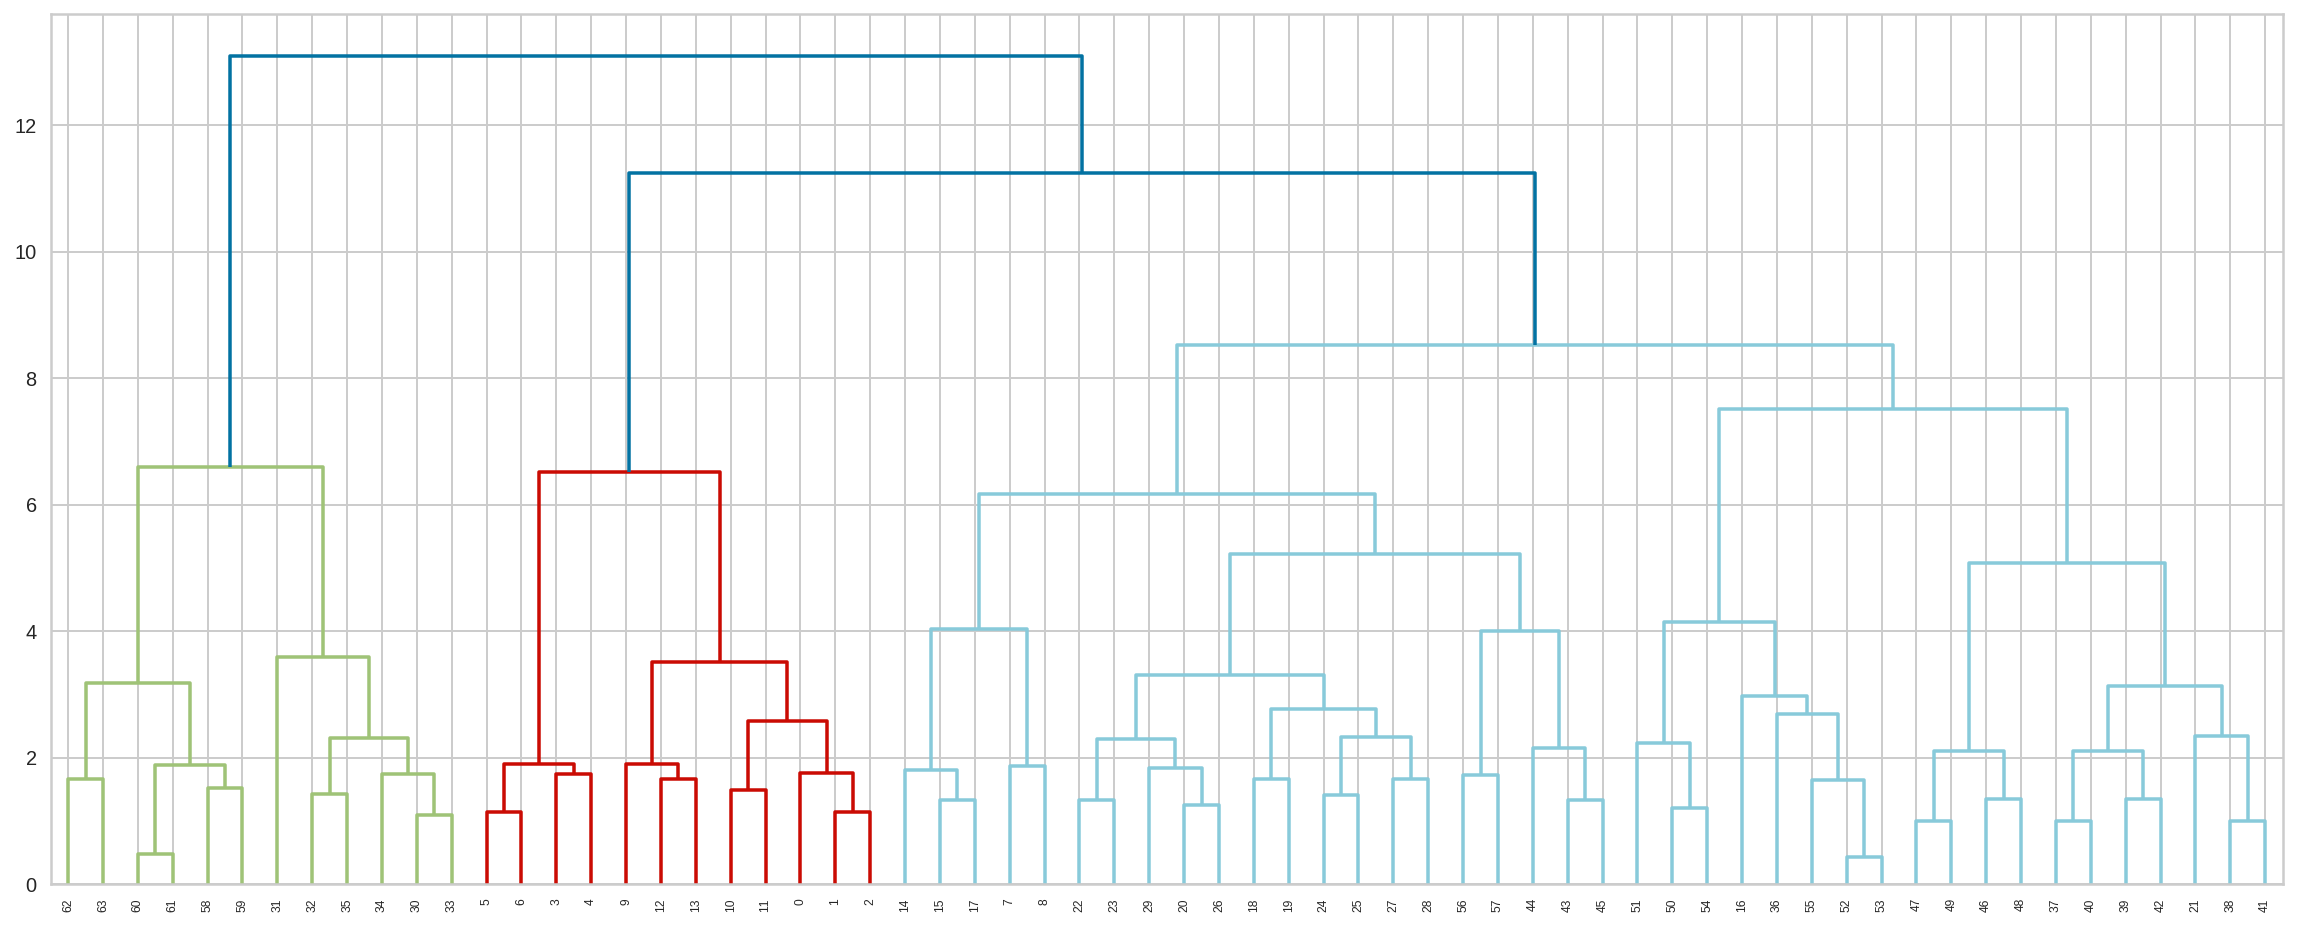

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
dg = sch.dendrogram(sch.linkage(data_trans, method= 'ward'), ax =ax)

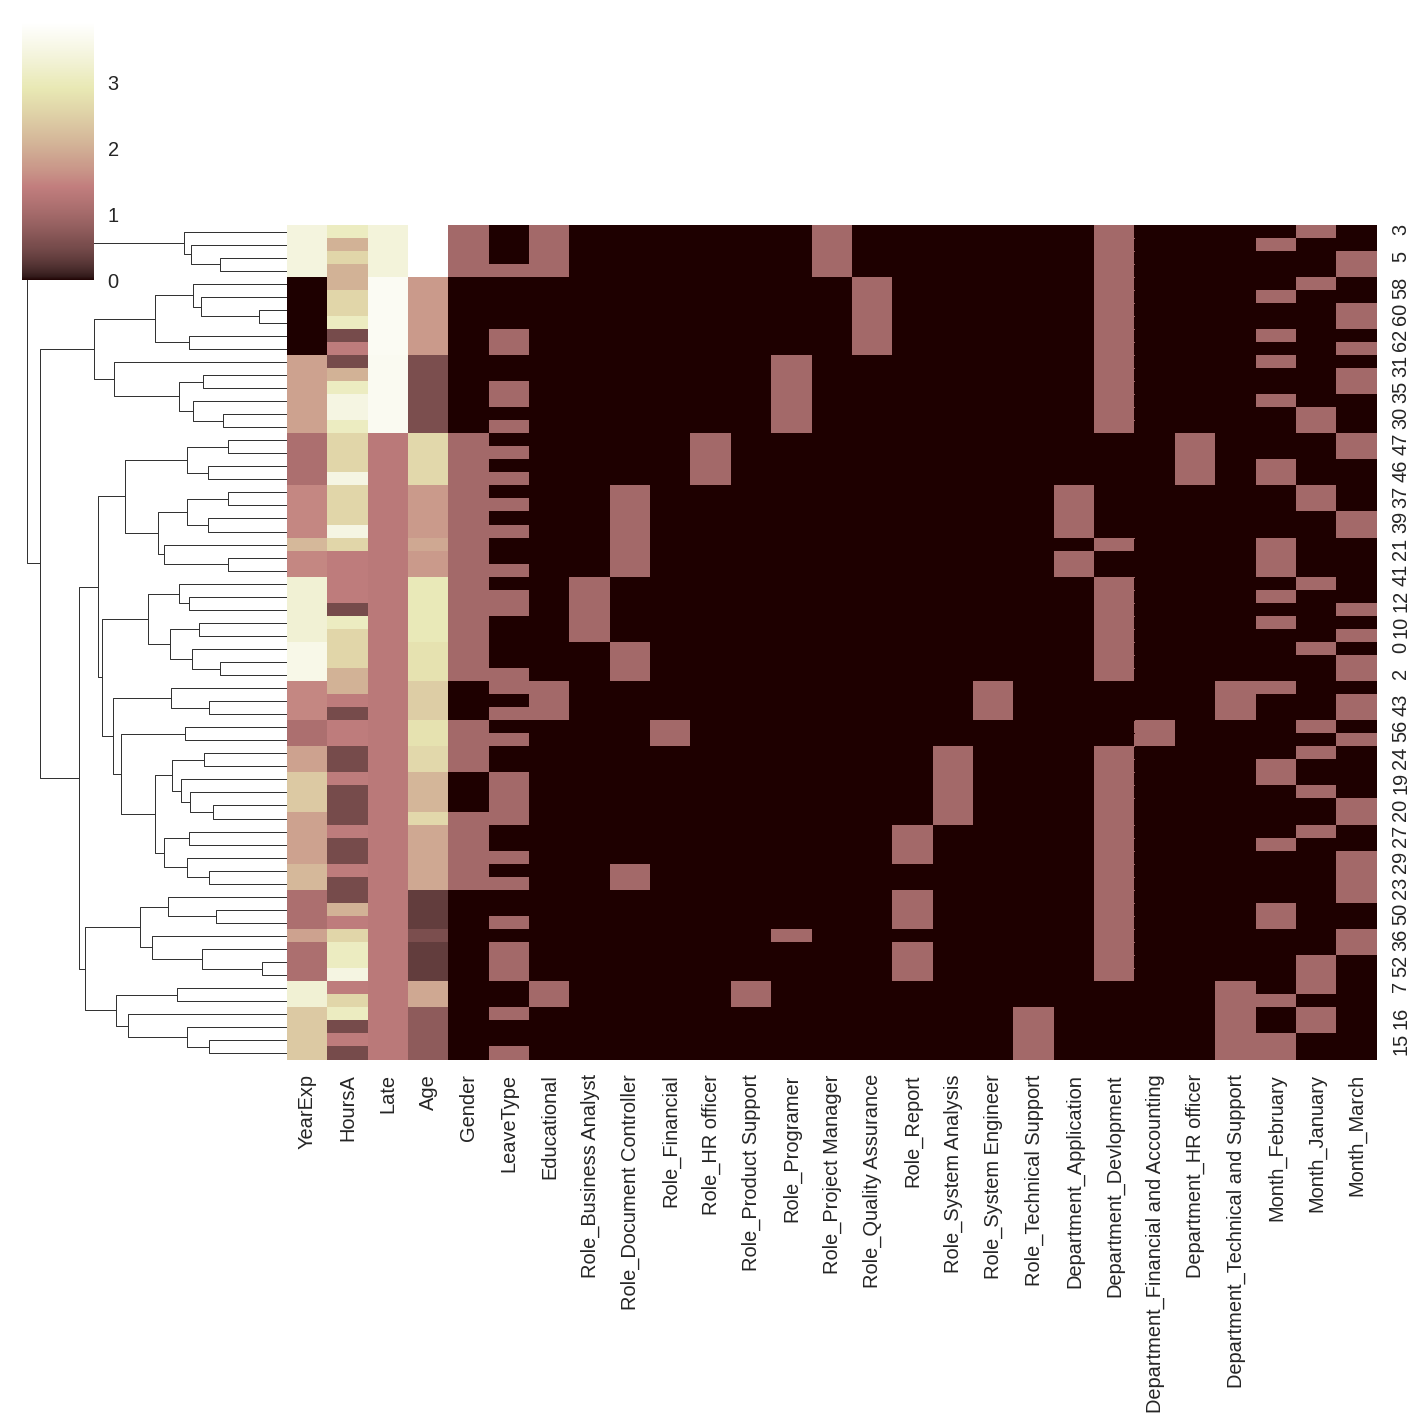

In [ ]:
#ดูแบบละเอียด ในระดับของแต่ละแถว
sns.clustermap(data_trans, col_cluster = False, cmap = "pink")

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc

AgglomerativeClustering(n_clusters=4)

In [ ]:
hc.fit(data_trans)

AgglomerativeClustering(n_clusters=4)

In [ ]:
y_hc=hc.fit_predict(data_trans)

In [ ]:
hc.labels_

array([2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1])

In [ ]:
x = np.array(data_trans)
print(x)

[[3.58147757 2.59670543 1.33562868 ... 0.         1.         0.        ]
 [3.58147757 2.59670543 1.33562868 ... 0.         0.         1.        ]
 [3.58147757 2.0475415  1.33562868 ... 0.         0.         1.        ]
 ...
 [0.01       3.072679   3.73443668 ... 0.         0.         1.        ]
 [0.01       0.50713089 3.73443668 ... 1.         0.         0.        ]
 [0.01       1.38429967 3.73443668 ... 0.         0.         1.        ]]


In [ ]:
import plotly as plt
import plotly.graph_objects as go

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(X)

# creating pandas dataframe
data_trans['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(
    
    # storing the variables in x, y, and z axis
    x= data_trans['YearExp'],
    y= data_trans['HoursA'],
    z= data_trans['Age'],
    mode='markers',
     marker=dict(
        color = data_trans['cluster'], 
        size= 3,
        line=dict(
            color= data_trans['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph 
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'YearExp'),
            yaxis = dict(title  = 'HoursA'),
            zaxis = dict(title  = 'Age')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

In [ ]:
data_trans

,YearExp,HoursA,Late,Age,Gender,LeaveType,Educational,Role_Business Analyst,Role_Document Controller,Role_Financial,...,Role_Technical Support,Department_Application,Department_Devlopment,Department_Financial and Accounting,Department_HR officer,Department_Technical and Support,Month_February,Month_January,Month_March,cluster
0,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,3.581478,2.047541,1.335629,2.810870,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,3.452698,3.072679,3.392183,3.930607,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,3
4,3.452698,2.047541,3.392183,3.930607,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.010000,2.596705,3.734437,1.746760,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
60,0.010000,2.596705,3.734437,1.746760,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
61,0.010000,3.072679,3.734437,1.746760,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
62,0.010000,0.507131,3.734437,1.746760,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
data_trans.plot.scatter(x='HoursA', y='Age', c=hc.labels_.map({'0':'blue', '1':'green', '2':'red', '3':'pink'}))

AttributeError: ignored

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
data_trans.cluster

0     0
1     0
2     0
3     3
4     3
     ..
59    1
60    1
61    1
62    1
63    1
Name: cluster, Length: 64, dtype: int64

In [ ]:
data

[Scatter3d({
     'marker': {'color': array([0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
                'line': {'color': array([0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                         0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
                         'width': 12},
                'opacity': 0.9,
                'size': 3},
     'mode': 'markers',
     'x': array([3.58147757, 3.58147757, 3.58147757, 3.45269762, 3.45269762, 3.45269762,
                 3.45269762, 3.31378115, 3.31378115, 3.31378115, 3.31378115, 3.31378115,
                 3.31378115, 3.31378115, 2.39639214, 2.39639214, 2.39639214, 2.

In [ ]:
data2=pd.DataFrame(data)
data2

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,textposition,hovertemplate,visible,line,metasrc,meta,legendrank,hovertextsrc,idssrc,error_y,...,z,mode,uirevision,textsrc,xsrc,opacity,hoverinfosrc,xcalendar,yhoverformat,surfacecolor


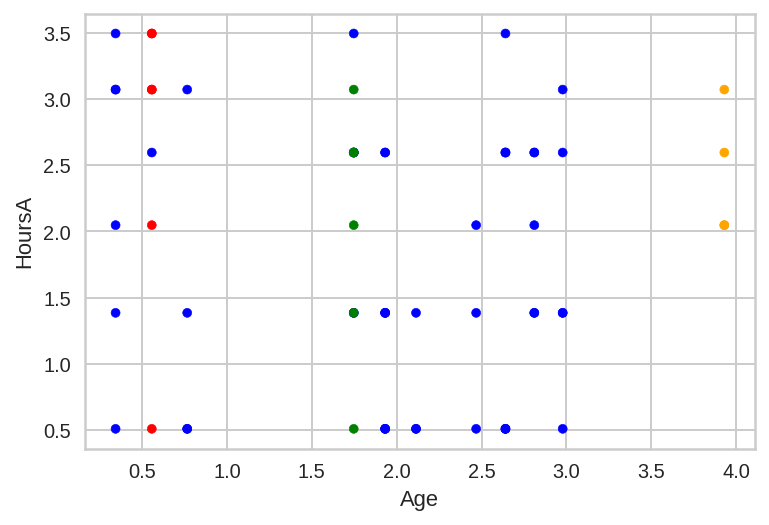

In [ ]:
#data_trans.plot.scatter(x='HoursA', y='Age', c=hc.labels_, cmap='rainbow')
data_trans.plot.scatter(x='Age', y='HoursA', 
                        grid = True,
                        c=data_trans.cluster.map({0:'blue', 1:'green', 2:'red', 3:'orange'}))

In [ ]:
data_trans['cluster'] = hc.labels_
data_trans.head()

,YearExp,HoursA,Late,Age,Gender,LeaveType,Educational,Role_Business Analyst,Role_Document Controller,Role_Financial,...,Role_Technical Support,Department_Application,Department_Devlopment,Department_Financial and Accounting,Department_HR officer,Department_Technical and Support,Month_February,Month_January,Month_March,cluster
0,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,2
1,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,2
2,3.581478,2.047541,1.335629,2.810870,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,2
3,3.452698,3.072679,3.392183,3.930607,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2
4,3.452698,2.047541,3.392183,3.930607,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,2


In [ ]:
data_scaled.sample(64)

In [ ]:
Cluster = pd.DataFrame(data_trans['cluster'])
Cluster

,cluster
0,0
1,0
2,0
3,3
4,3
...,...
59,1
60,1
61,1
62,1


In [ ]:
#นำข้อมูลออก
Cluster.to_excel('HCA(OneHot-Johnson)3.xlsx')

In [ ]:
data2 = pd.DataFrame(data)
data2

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,hovertemplatesrc,stream,textposition,zcalendar,projection,z,hovertextsrc,line,idssrc,textfont,...,ycalendar,uid,legendgrouptitle,legendgroup,zsrc,opacity,surfaceaxis,mode,connectgaps,scene


In [ ]:
data_cluster = pd.concat([data2,Cluster], axis=1)
data_cluster

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,cluster
0,hovertemplatesrc,stream,textposition,zcalendar,projection,z,hovertextsrc,line,idssrc,textfont,...,uid,legendgrouptitle,legendgroup,zsrc,opacity,surfaceaxis,mode,connectgaps,scene,2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
#นำข้อมูลออก
data_cluster.to_excel('HCA(OneHot-Johnson).xlsx')

In [ ]:
data.groupby('cluster').agg(['count', 'mean', 'median']).T

In [ ]:
cols = ['Gender','Role','Department','YearExp','Month','LeaveType','HoursA','Late','Age','Educational']
fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize = (20, 6))
ax = ax.ravel()
for i, col in enumerate(cols):
  sns.violinplot(x = 'cluster', y=col, data = data, ax = ax[i])

In [ ]:
cols =['Gender','Role','Department','YearExp','Month','LeaveType','HoursA','Late','Age','Educational','cluster']
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(data[cols].groupby('cluster').mean(), cmap = "Blues", linewidths=1, square=True, annot=True, fmt='.2f', ax =ax);

In [ ]:
data.groupby('cluster').head(3).sort_values('cluster')


#Test

In [ ]:
data2 = data_trans.drop(["cluster"],axis=1)
data2

,YearExp,HoursA,Late,Age,Gender,LeaveType,Educational,Role_Business Analyst,Role_Document Controller,Role_Financial,...,Role_System Engineer,Role_Technical Support,Department_Application,Department_Devlopment,Department_Financial and Accounting,Department_HR officer,Department_Technical and Support,Month_February,Month_January,Month_March
0,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,3.581478,2.596705,1.335629,2.810870,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,3.581478,2.047541,1.335629,2.810870,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,3.452698,3.072679,3.392183,3.930607,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3.452698,2.047541,3.392183,3.930607,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.010000,2.596705,3.734437,1.746760,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
60,0.010000,2.596705,3.734437,1.746760,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
61,0.010000,3.072679,3.734437,1.746760,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
62,0.010000,0.507131,3.734437,1.746760,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
data_scaled.describe().T

Elbow Method to determine the number of clusters to be formed:


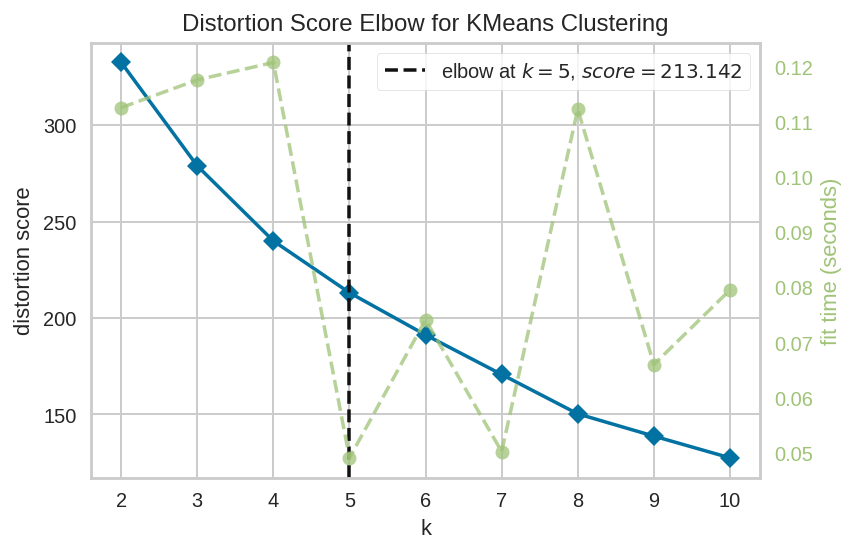

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data2)
Elbow_M.show()

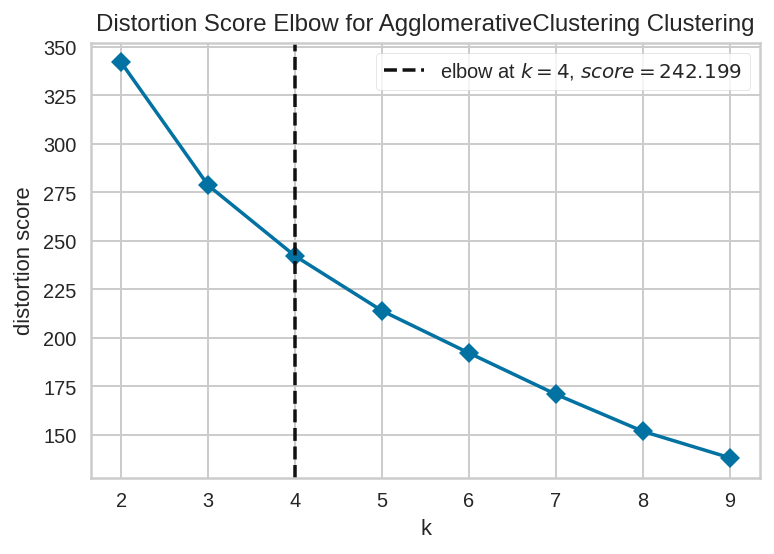

In [ ]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(data2)
# Finalize and render figure
visualizer.show()

In [ ]:
data_trans

,YearExp,HoursA,Late,Age,Gender,LeaveType,Educational,Role_Business Analyst,Role_Document Controller,Role_Financial,...,Role_System Engineer,Role_Technical Support,Department_Application,Department_Devlopment,Department_Financial and Accounting,Department_HR officer,Department_Technical and Support,Month_February,Month_January,Month_March
0,1.669977,0.685204,-0.575872,0.899369,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1.669977,0.685204,-0.575872,0.899369,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1.669977,0.136040,-0.575872,0.899369,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,1.541197,1.161178,1.480682,2.019106,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1.541197,0.136040,1.480682,2.019106,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-1.901501,0.685204,1.822936,-0.164741,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
60,-1.901501,0.685204,1.822936,-0.164741,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
61,-1.901501,1.161178,1.822936,-0.164741,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
62,-1.901501,-1.404370,1.822936,-0.164741,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(data_scaled.columns, model_lr.coef_[0], color = 'lightcoral')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data)
data["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC